# Proyek Analisis Data: Kualitas Udara Wilayah Urban, Suburban, dan Rural di Kota Beijing
- **Nama:** Fadhilah Hafidz Haditama
- **Email:** mc001d5x1730@student.devacademy.id
- **ID Dicoding:** MC001D5X1730

## Menentukan Pertanyaan Bisnis

- Bagaimana konsentrasi bulanan polutan PM2.5, PM10, dan O3 di wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huariou)?
- Bagaimana pola diurnal polutan PM2.5, PM10, dan O3 di wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huariou)?
- Apakah konsentrasi polutan PM2.5, PM10, dan O3 di atas BMUA harian (24 jam) untuk wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huariou)?
- Bagaimana kategori data rata-rata bulanan di wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huariou)?

## Import Semua Packages/Library yang Digunakan

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
# Set working directory
from google.colab import files
uploaded = files.upload()

Saving PRSA_Data_Changping_20130301-20170228.csv to PRSA_Data_Changping_20130301-20170228.csv
Saving PRSA_Data_Huairou_20130301-20170228.csv to PRSA_Data_Huairou_20130301-20170228.csv
Saving PRSA_Data_Wanshouxigong_20130301-20170228.csv to PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [4]:
# Load data
df = pd.concat([pd.read_csv(file, delimiter=',') for file in uploaded], ignore_index=True)
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping  


In [5]:
#Tambah kolom tanggal
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station                date  
0  1020.8 -19.7   0.0    E   0.5  Changping 2013-03-01 00:00:00  
1  1021.3 -19.0   0.0  ENE   0.7  Changping 2013-03-01 01:00:00  
2  1021.3 -19.9   0.0  ENE   0.2  Changping 2013-03-01 02:00:00  
3  1021.8 -19.1   0.0  NNE   1.0  Changping 2013-03-01 03:00:00  
4  1022.3 -19.4   0.0    N   2.1  Changping 2013-03-01 04:00:00  


In [6]:
# Ambil data, buang yang tidak perlu, buat urutan kolom baru
df = df.drop(['No', 'DEWP','PRES', 'wd', 'SO2', 'NO2', 'CO','TEMP', 'PRES', 'RAIN', 'WSPM'], axis=1)
new_order = ["station"] + ['date'] + [col for col in df if col != "station" and col != 'date']
df = df[new_order]

# Menghapus baris di mana tahun dalam kolom 'date' adalah 2017
df = df[df['date'].dt.year != 2017]

print(df.head())
print(df.tail())

     station                date  year  month  day  hour  PM2.5  PM10    O3
0  Changping 2013-03-01 00:00:00  2013      3    1     0    3.0   6.0  85.0
1  Changping 2013-03-01 01:00:00  2013      3    1     1    3.0   3.0  85.0
2  Changping 2013-03-01 02:00:00  2013      3    1     2    3.0   3.0  74.0
3  Changping 2013-03-01 03:00:00  2013      3    1     3    3.0   6.0  81.0
4  Changping 2013-03-01 04:00:00  2013      3    1     4    3.0   3.0  81.0
              station                date  year  month  day  hour  PM2.5  \
103771  Wanshouxigong 2016-12-31 19:00:00  2016     12   31    19  449.0   
103772  Wanshouxigong 2016-12-31 20:00:00  2016     12   31    20  460.0   
103773  Wanshouxigong 2016-12-31 21:00:00  2016     12   31    21  463.0   
103774  Wanshouxigong 2016-12-31 22:00:00  2016     12   31    22  493.0   
103775  Wanshouxigong 2016-12-31 23:00:00  2016     12   31    23  464.0   

         PM10   O3  
103771  487.0  4.0  
103772  492.0  4.0  
103773  498.0  5.0  
103

**Insight:**
- Pengambilan dataset Air-Quality-Dataset dari dataset dicoding
- Pengambilan waktu dan data konsentrasi polutan PM2.5, PM10, dan O3 saja
- Pembuangan kolom parameter kondisi cuaca

### Assessing Data

0
<class 'pandas.core.frame.DataFrame'>
Index: 100944 entries, 0 to 103775
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  100944 non-null  object        
 1   date     100944 non-null  datetime64[ns]
 2   year     100944 non-null  int64         
 3   month    100944 non-null  int64         
 4   day      100944 non-null  int64         
 5   hour     100944 non-null  int64         
 6   PM2.5    98579 non-null   float64       
 7   PM10     99156 non-null   float64       
 8   O3       98181 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 7.7+ MB
None
station       0
date          0
year          0
month         0
day           0
hour          0
PM2.5      2365
PM10       1788
O3         2763
dtype: int64
          station                 date           year          month  \
count      100944               100944  100944.000000  100944.000000   


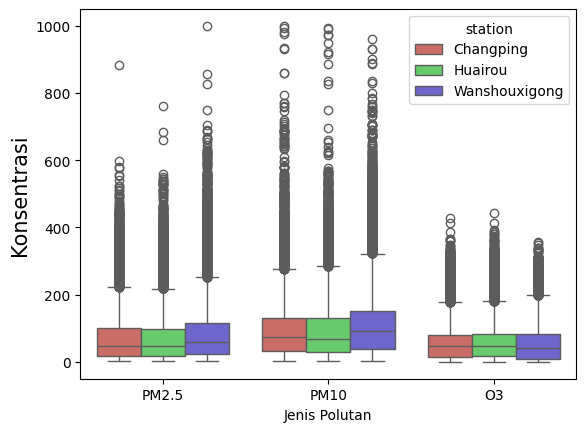

In [7]:
#cek data duplikat
print(df.duplicated().sum())

#cek data
print(df.info())

#cek data kosong
print(df.isnull().sum())

#cek statistik data
print(df.describe(include='all'))

#cek sebaran data pencilan PM2.5, PM10, O3 dengan boxplot
melted_pollutans = df.melt(id_vars='station', value_vars= ['PM2.5', 'PM10', 'O3'],
                    var_name='Polutan', value_name='Konsentrasi')

#boxplot
dist_polutan = sns.boxplot(x='Polutan', y='Konsentrasi',data=melted_pollutans, hue='station', palette="hls", dodge= True)
dist_polutan.set_xlabel('Jenis Polutan')
dist_polutan.set_ylabel('Konsentrasi',size=15)
plt.show()

**Insight:**
- Tidak ada data duplikat
- Terdapat missing value di polutan dan parameter cuaca
- Data min rendah dan max sangat jauh dari nilai normal aktualnya (untuk polutan)
- Terlalu banyak pencilan atas dan sedikit pencilan bawah untuk semua jenis polutan dalam waktu jam an
- Data polutan terpantau sesuai sebaran

### Cleaning Data

In [8]:
#karena missing value dibawah 20% (standar kebutuhan data pencemaran udara) dari total data maka drop baris NA
df = df.dropna()

#memastikan nilai null
print(df.isnull().sum())

station    0
date       0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
O3         0
dtype: int64


In [9]:
#ambil data yang memiliki pencilan
kolom_polutan = df[["PM2.5", "PM10", "O3"]]

'''Ganti data pencilan. Nilai pencilan atas menjadi max normal dan pencilan bawah menjadi min normal.
Argumen ini didukung kemungkinan data dengan nilai diluar normal menandakan kondisi aktual yang memang ekstrem
(wajar untuk wilayah dengan banyak anomali seperti industrial), namun terlalu tinggi bahkan untuk nilai ekstrem, ex: PM10 999 μg/m³ tiap jam'''

for colomns in kolom_polutan:
  for station, group in df.groupby('station'):
    #membuat nilai kuartil berdasarkan masing-masing jenis polutan di masing-masing stasiun
    Q1 = group[colomns].quantile(0.25)
    Q3 = group[colomns].quantile(0.75)
    #membuat nilai jangkauan berdasarkan masing-masing jenis polutan di masing-masing stasiun
    IQR = Q3 - Q1
    #batas atas dan batas bawah sebaran normal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #kondisi pencilan
    lower_than = df[colomns] < lower_bound
    upper_than = df[colomns] > upper_bound
    #ganti data pencilan
    df[colomns] = df[colomns].mask(cond=lower_than, other=lower_bound)
    df[colomns] = df[colomns].mask(cond=upper_than, other=upper_bound)
#melihat statistik data setelah cleaning pencilan
df.describe()

,date,year,month,day,hour,PM2.5,PM10,O3
count,97183,97183.000000,97183.000000,97183.000000,97183.000000,97183.000000,97183.000000,97183.000000
mean,2015-02-03 20:08:28.199993856,2014.574977,6.733235,15.734151,11.516448,70.356247,95.337715,56.455966
min,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.214200
25%,2014-02-18 15:00:00,2014.000000,4.000000,8.000000,6.000000,19.000000,34.000000,14.000000
50%,2015-02-05 06:00:00,2015.000000,7.000000,16.000000,12.000000,51.000000,77.000000,46.267200
75%,2016-01-21 17:00:00,2016.000000,10.000000,23.000000,18.000000,104.000000,138.000000,82.145700
max,2016-12-31 23:00:00,2016.000000,12.000000,31.000000,23.000000,218.000000,276.500000,178.500000
std,NaN,1.098452,3.363855,8.792207,6.927815,62.135242,74.380409,49.588671


In [ ]:
df.to_csv('main_data.csv', index=False)

In [10]:
#Persentase data set setelah cleaning
for colomns in [col for col in df.columns if col not in ['station','date']]:
  persentase = df[colomns].count() / 100944 * 100
  print(f"Persentase data {colomns} setelah cleaning: {persentase:.2f}%")

Persentase data year setelah cleaning: 96.27%
Persentase data month setelah cleaning: 96.27%
Persentase data day setelah cleaning: 96.27%
Persentase data hour setelah cleaning: 96.27%
Persentase data PM2.5 setelah cleaning: 96.27%
Persentase data PM10 setelah cleaning: 96.27%
Persentase data O3 setelah cleaning: 96.27%


**Insight:**
- Data PM2.5, PM10, O3 cukup tinggi dan wajar untuk di wilayah perkotaan Beijing
- Persentase jumlah data setelah proses cleaning di atas 80%, sehingga cukup dalam penilaian konsentrasi polutan

## Exploratory Data Analysis (EDA)

### Explore nilai statistik per stasiun tiap polutan

In [11]:
#lihat data statistik berdasarkan group stasiun dan polutan
df.groupby("station").agg({
    'PM2.5': ['mean', 'median', 'min', 'max', 'std'],
    'PM10': ['mean', 'median', 'min', 'max', 'std'],
    'O3': ['mean', 'median', 'min', 'max', 'std'],
})

PM2.5                                      PM10         \
                    mean median  min    max        std        mean median   
station                                                                     
Changping      67.467478   47.0  2.0  218.0  61.007488   91.569803   73.0   
Huairou        66.376331   47.0  2.0  218.0  60.227145   88.964283   70.0   
Wanshouxigong  77.251510   59.0  3.0  218.0  64.519414  105.510723   90.0   

                                             O3                        \
               min    max        std       mean median     min    max   
station                                                                 
Changping      2.0  276.5  71.693922  56.517418   47.0  0.2142  178.5   
Huairou        2.0  276.5  72.612038  57.898754   49.0  0.2142  178.5   
Wanshouxigong  2.0  276.5  77.660063  54.954609   43.0  0.2142  178.5   

                          
                     std  
station                   
Changping      48.440989  
Huairou        48.157246  
Wanshouxigong  52.041814

### Explore Konsentrasi polutan dalam bulanan

In [12]:
#konsentrasi rata-rata bulanan
df_bulanan = df.groupby(['station', 'year', 'month']).agg({
    'PM2.5': ['mean'],
    'PM10': ['mean'],
    'O3': ['mean'],
})
df_bulanan = df_bulanan.reset_index()

#flattering nilai hierarki agg
df_bulanan.columns = ['station', 'year', 'month', 'PM2.5', 'PM10', 'O3']
print(df_bulanan)

#melt data untuk mempermudah visualisasi catplot
visualisasi_bulanan = df_bulanan.melt(id_vars=['station', 'year', 'month'],
                                        value_vars=['PM2.5', 'PM10', 'O3'],
                                        var_name='Parameter', value_name='Nilai')
#tambahkan date
visualisasi_bulanan['date'] = pd.to_datetime(visualisasi_bulanan[['year', 'month']].assign(day=1))
print(visualisasi_bulanan)

#lihat data untuk visualisasi diurnal
print(visualisasi_bulanan)

           station  year  month       PM2.5        PM10         O3
0        Changping  2013      3   92.845737  118.796346  59.961615
1        Changping  2013      4   58.908451   89.165493  67.702528
2        Changping  2013      5   80.843111  117.226467  90.341800
3        Changping  2013      6   80.739003  102.133431  77.459422
4        Changping  2013      7   62.006812   65.393733  76.263452
..             ...   ...    ...         ...         ...        ...
133  Wanshouxigong  2016      8   50.741144   64.731608  73.580381
134  Wanshouxigong  2016      9   57.716788   69.773723  54.691241
135  Wanshouxigong  2016     10   81.905149   94.282520  19.949864
136  Wanshouxigong  2016     11   99.783821  129.585077  13.926081
137  Wanshouxigong  2016     12  120.434783  144.370924  15.099185

[138 rows x 6 columns]
           station  year  month Parameter      Nilai       date
0        Changping  2013      3     PM2.5  92.845737 2013-03-01
1        Changping  2013      4     PM2.5  5

### Explore Konsentrasi polutan dalam jam

In [13]:
#konsentrasi rata-rata diurnal
Pola_diurnal = df.groupby(['station', 'year', 'month', 'day','hour',]).agg({
    'PM2.5': ['mean'],
    'PM10': ['mean'],
    'O3': ['mean'],
})
Pola_diurnal = Pola_diurnal.reset_index()

#flattering nilai hierarki agg
Pola_diurnal.columns = ['station', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'O3']

#tambahkan kolom date
Pola_diurnal['date'] = pd.to_datetime(Pola_diurnal[['year', 'month', 'day', 'hour']])

#lihat hasil flattering
print(Pola_diurnal)

#melt data untuk mempermudah visualisasi catplot
visualisasi_diurnal = Pola_diurnal.melt(id_vars=['station', 'year', 'month','day','hour','date'],
                                        value_vars=['PM2.5', 'PM10', 'O3'],
                                        var_name='Parameter', value_name='Nilai')
#lihat data untuk visualisasi diurnal
print(visualisasi_diurnal)

             station  year  month  day  hour  PM2.5   PM10    O3  \
0          Changping  2013      3    1     0    3.0    6.0  85.0   
1          Changping  2013      3    1     1    3.0    3.0  85.0   
2          Changping  2013      3    1     2    3.0    3.0  74.0   
3          Changping  2013      3    1     3    3.0    6.0  81.0   
4          Changping  2013      3    1     4    3.0    3.0  81.0   
...              ...   ...    ...  ...   ...    ...    ...   ...   
97178  Wanshouxigong  2016     12   31    19  218.0  276.5   4.0   
97179  Wanshouxigong  2016     12   31    20  218.0  276.5   4.0   
97180  Wanshouxigong  2016     12   31    21  218.0  276.5   5.0   
97181  Wanshouxigong  2016     12   31    22  218.0  276.5   8.0   
97182  Wanshouxigong  2016     12   31    23  218.0  276.5   7.0   

                     date  
0     2013-03-01 00:00:00  
1     2013-03-01 01:00:00  
2     2013-03-01 02:00:00  
3     2013-03-01 03:00:00  
4     2013-03-01 04:00:00  
...            

### Explore konsentrasi terhadap BMUA PM2.5 dan PM10

In [14]:
#data pola harian
Pola_harian = df.groupby(['station', 'year', 'month', 'day']).agg({
    'PM2.5': ['mean'],
    'PM10': ['mean'],
    'O3': ['mean']
})
Pola_harian = Pola_harian.reset_index()

#flattering data hierarki agg
Pola_harian.columns = ['station', 'year', 'month', 'day', 'PM2.5', 'PM10', 'O3']

#menambahkan nilai standar BMUA China polutan PM25
Pola_harian['BMUA_PM25'] = 75

#menambahkan nilai standar BMUA China polutan PM10
Pola_harian['BMUA_PM10'] = 150

#menambahkan nilai standar BMUA polutan O3
Pola_harian['BMUA_O3'] = 100

#lihat hasil
#hasil rata-rata data harian
print(Pola_harian)

#Konsentrasi Rata-Rata PM2.5 dan BMUA PM2.5
vis_PM25 = Pola_harian.melt(id_vars=['station', 'year', 'month', 'day'],
                                        value_vars=['PM2.5', 'BMUA_PM25'],
                                        var_name='Polutan', value_name='Konsentrasi (μg/m³)')
#tambahkan kolom date
vis_PM25['date'] = pd.to_datetime(vis_PM25[['year', 'month', 'day']])

#Konsentrasi Rata-rata PM10 dan BMUA PM10
vis_PM10 = Pola_harian.melt(id_vars=['station', 'year', 'month', 'day'],
                                        value_vars=['PM10', 'BMUA_PM10'],
                                        var_name='Polutan', value_name='Konsentrasi (μg/m³)')
#tambahkan kolom date
vis_PM10['date'] = pd.to_datetime(vis_PM10[['year', 'month', 'day']])


#Konsentrasi Rata-rata O3
vis_O3 = Pola_harian.melt(id_vars=['station', 'year', 'month', 'day'],
                                        value_vars=['O3', 'BMUA_O3'],
                                        var_name='Polutan', value_name='Konsentrasi (μg/m³)')
#tambahkan kolom date
vis_O3['date'] = pd.to_datetime(vis_O3[['year', 'month', 'day']])

print(vis_PM25)
print(vis_PM10)
print(vis_O3)

            station  year  month  day       PM2.5        PM10         O3  \
0         Changping  2013      3    1    5.083333   18.958333  77.791667   
1         Changping  2013      3    2   34.173913   40.521739  28.652174   
2         Changping  2013      3    3   57.541667   82.666667  31.333333   
3         Changping  2013      3    4   20.791667   36.166667  66.458333   
4         Changping  2013      3    5  106.958333  125.166667  88.750000   
...             ...   ...    ...  ...         ...         ...        ...   
4169  Wanshouxigong  2016     12   27   40.958333   54.583333  26.541667   
4170  Wanshouxigong  2016     12   28   88.900000   94.500000  20.600000   
4171  Wanshouxigong  2016     12   29   61.583333   86.916667  22.791667   
4172  Wanshouxigong  2016     12   30  208.291667  258.395833   7.375000   
4173  Wanshouxigong  2016     12   31  218.000000  276.500000   6.000000   

      BMUA_PM25  BMUA_PM10  BMUA_O3  
0            75        150      100  
1          

**Insight:**
- Terlihat jelas perbandingan konsentrasi polutan secara keseluruhan di 3 tempat dengan jenis wilayah berbeda
- Mencari nilai bulanan tiap stasiun
- Mencari nilai diurnal/per jam tiap stasiun

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana konsentrasi bulanan polutan PM2.5, PM 10, dan O3 di wilayah urban (Wanshouxigong), sub-urban (Changping), dan rural (Huariou)?

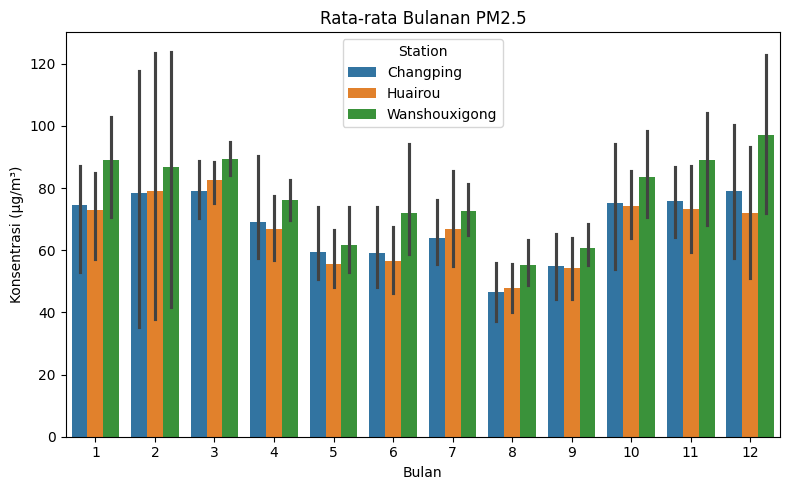

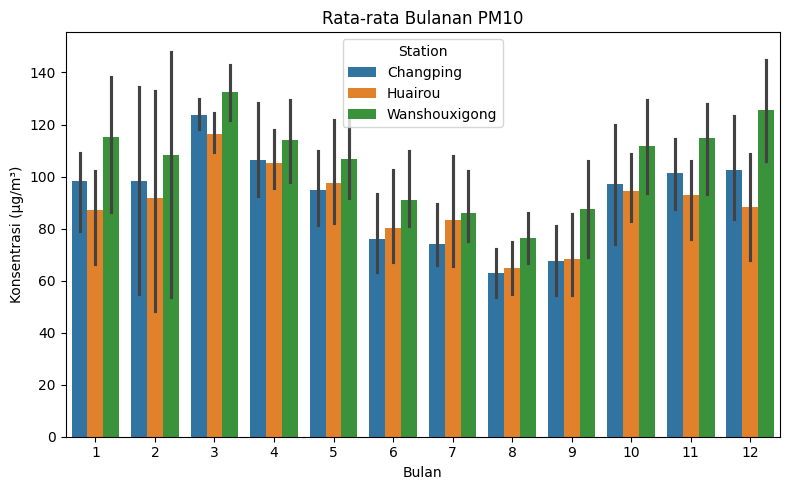

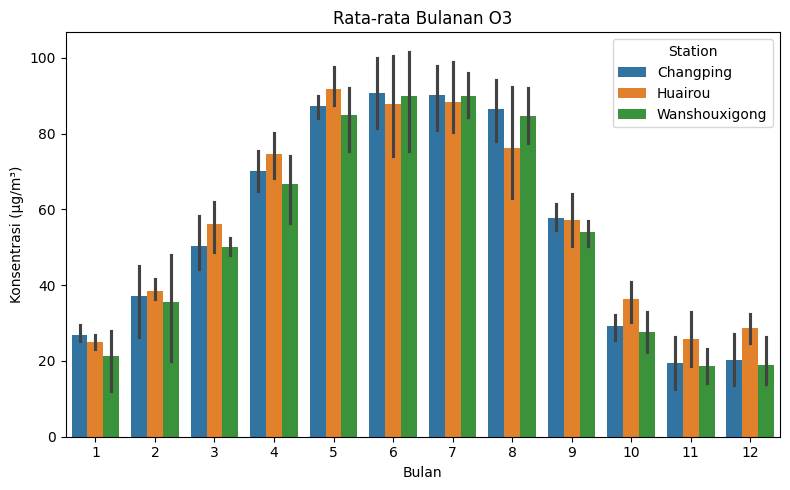

In [15]:
# visualisasi pola bulanan rata-rata keseluruhan dalam bentuk barplot
for parameter in visualisasi_bulanan['Parameter'].unique():
    df_polutan = visualisasi_bulanan[
        (visualisasi_bulanan['Parameter'] == parameter)]

    # Plot lineplot for this pollutant across all years
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=df_polutan,
        x='month', y='Nilai', hue='station'
    )
    plt.title(f"Rata-rata Bulanan {parameter}") # Judul menunjukkan rata-rata keseluruhan
    plt.xlabel("Bulan")
    plt.ylabel("Konsentrasi (μg/m³)")
    plt.legend(title='Station')
    plt.tight_layout()



    plt.show()


### Pertanyaan 2: Bagaimana pola diurnal polutan PM2.5, PM10, dan O3 di wilayah urban (Wanshouxigong), sub-urban (Changping), dan rural (Huariou)?

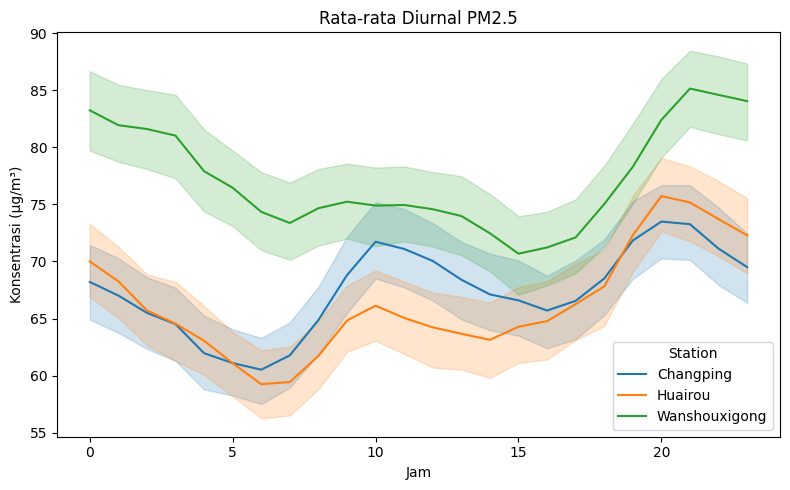

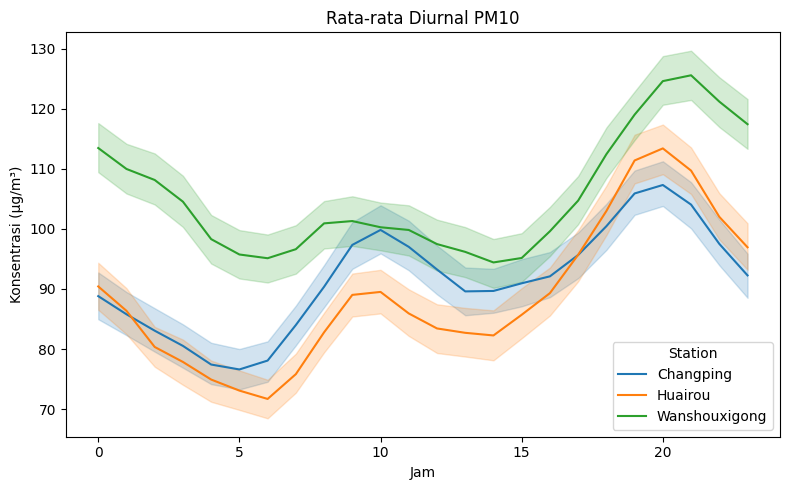

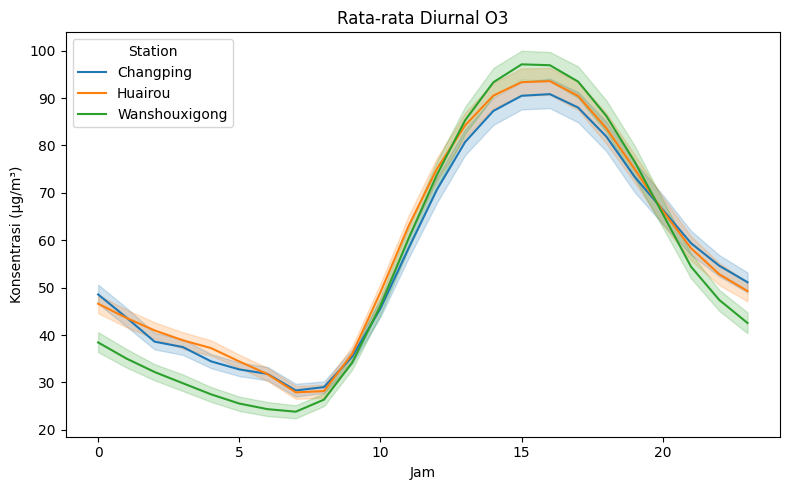

In [16]:
for parameter in visualisasi_diurnal['Parameter'].unique():
    # Filter data untuk polutan tertentu
    df_polutan = visualisasi_diurnal[visualisasi_diurnal['Parameter'] == parameter]

    # Plot lineplot untuk polutan ini
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data=df_polutan,
        x='hour', y='Nilai', hue='station'
    )
    plt.title(f"Rata-rata Diurnal {parameter}")
    plt.xlabel("Jam")
    plt.ylabel("Konsentrasi (μg/m³)")
    plt.legend(title='Station')
    plt.tight_layout()
    plt.show()

### Pertanyaann 3: Apakah konsentrasi polutan PM2.5, PM10, dan O3 di atas BMUA harian (24 jam) untuk wilayah urban (Wanshouxigong), sub-urban (Changping), dan rural (Huariou)?

Text(0, 0.5, 'Konsentrasi (μg/m³)')

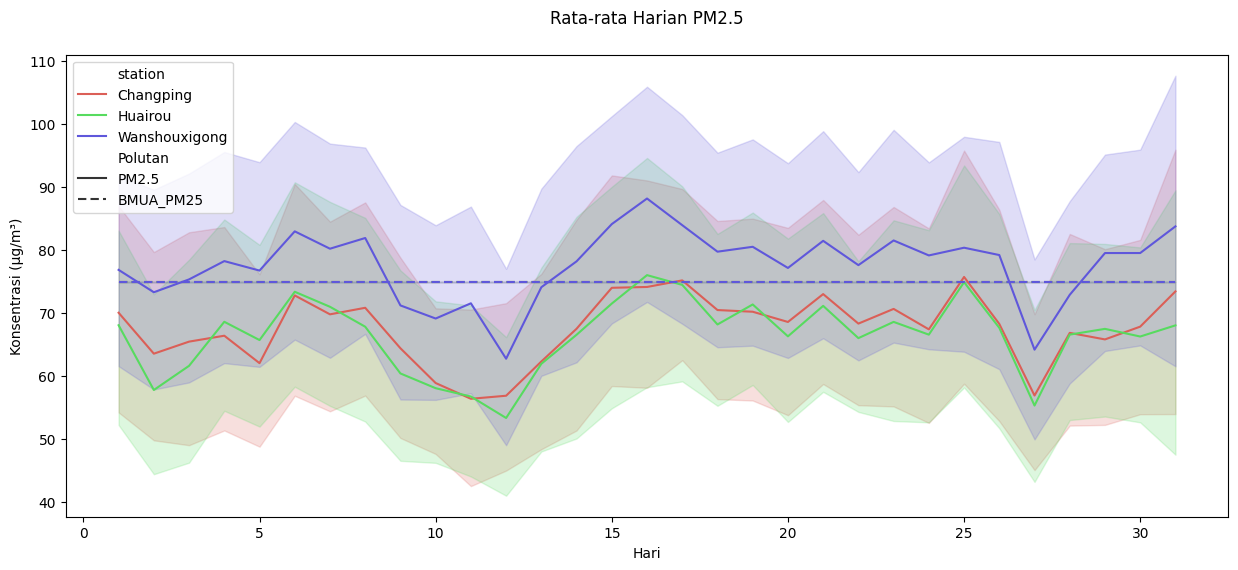

In [17]:
#plot line harian PM10
plt.figure(figsize=(15, 6))
line_PM25 = sns.lineplot(
    data=vis_PM25,
    x='day', y='Konsentrasi (μg/m³)',
    hue='station', style='Polutan',
    style_order=['PM2.5', 'BMUA_PM25'],  # Tentukan urutan style
    dashes={'PM2.5': '', 'BMUA_PM25': (4, 2)},  # Solid untuk PM2.5, putus-putus untuk BMUA
    palette='hls'
)

#judul plot
line_PM25.set_title("Rata-rata Harian PM2.5", y=1.05)

#nama sumbu x
line_PM25.set_xlabel("Hari")

#nama sumbu y
line_PM25.set_ylabel("Konsentrasi (μg/m³)")

Text(0, 0.5, 'Konsentrasi (μg/m³)')

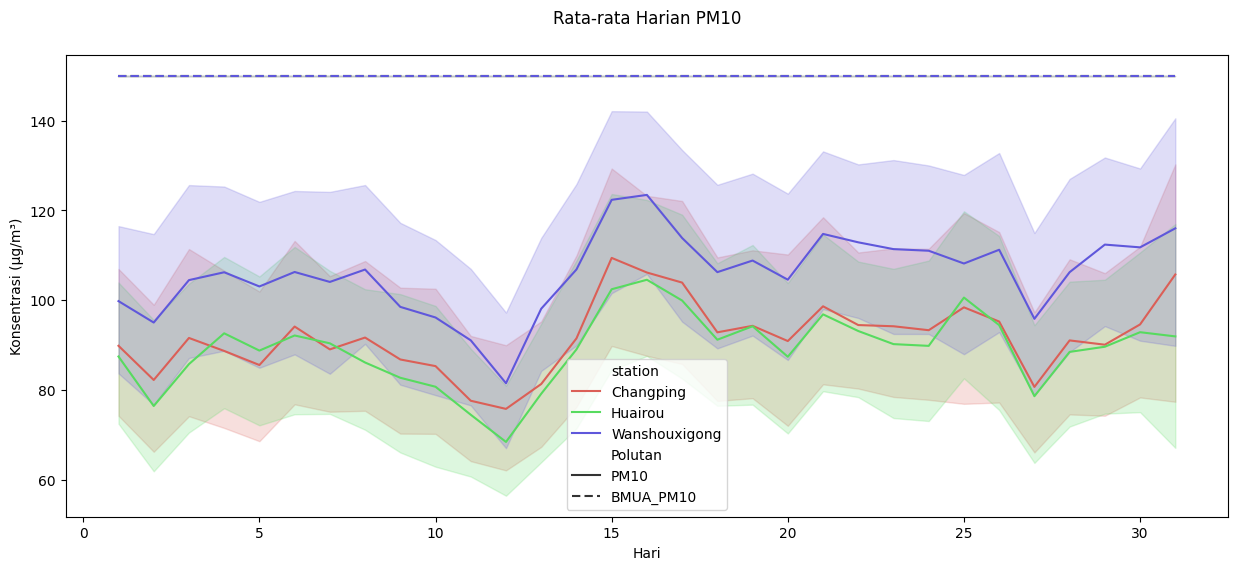

In [18]:
#plot line harian PM10
plt.figure(figsize=(15, 6))
line_PM10 = sns.lineplot(
    data=vis_PM10,
    x='day', y='Konsentrasi (μg/m³)',
    hue='station', style='Polutan',
    style_order=['PM10', 'BMUA_PM10'],
    dashes={'PM10': '', 'BMUA_PM10': (4, 2)},  # Solid untuk PM10, putus-putus untuk BMUA
    palette='hls'
)

#judul plot
line_PM10.set_title("Rata-rata Harian PM10", y=1.05)

#nama sumbu x
line_PM10.set_xlabel("Hari")

#nama sumbu y
line_PM10.set_ylabel("Konsentrasi (μg/m³)")

Text(0, 0.5, 'Konsentrasi (μg/m³)')

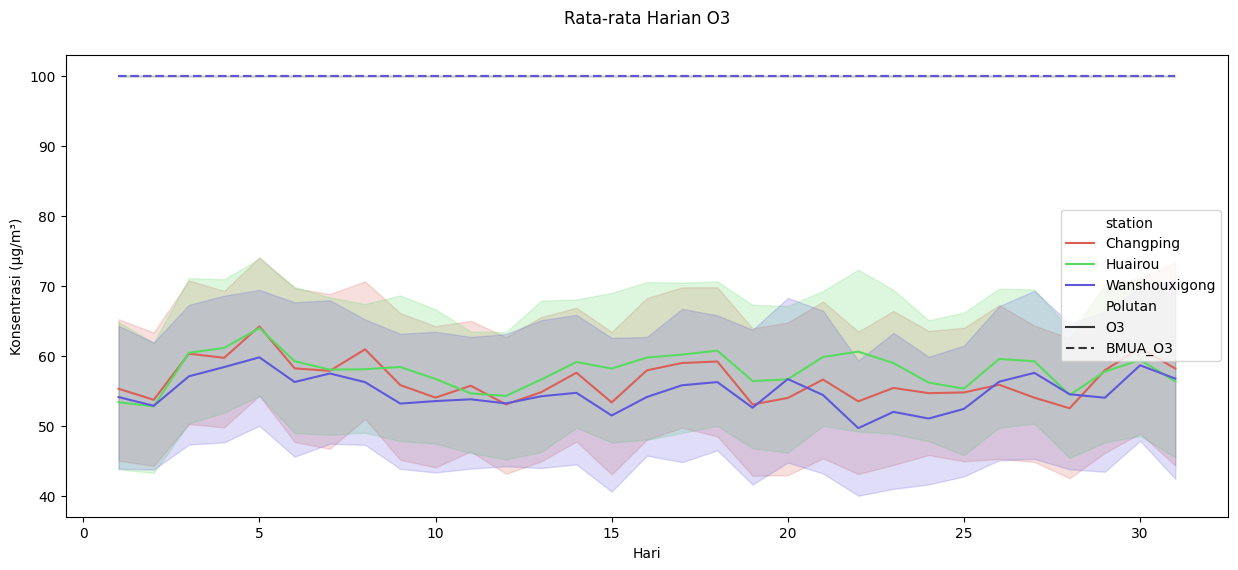

In [19]:
#plot line harian O3
plt.figure(figsize=(15, 6))
line_PM10 = sns.lineplot(
    data=vis_O3,
    x='day', y='Konsentrasi (μg/m³)',
    hue='station', style='Polutan',
    style_order=['O3', 'BMUA_O3'],
    dashes={'O3': '', 'BMUA_O3': (4, 2)},  # Solid untuk O3, putus-putus untuk BMUA
    palette='hls'
)

#judul plot
line_PM10.set_title("Rata-rata Harian O3", y=1.05)

#nama sumbu x
line_PM10.set_xlabel("Hari")

#nama sumbu y
line_PM10.set_ylabel("Konsentrasi (μg/m³)")

**Insight:**
- Pola bulanan PM2.5 dan PM10 menunjukkan dua puncak konsentrasi, yaitu pada awal dan akhir tahun dengan nilai terendah di pertengahan tahun. Pola ini dipengaruhi sudut deklinasi matahari dan musiman. Sebaliknya, konsentrasi O₃ mencapai puncaknya saat PM menurun, mengikuti pola yang berlawanan. Ozon troposfer semakin banyak pada musim kering (Juni-Juli-Agustus) akibat meningkatnya radiasi matahari dan suhu yang mempercepat reaksi fotokimia antara nitrogen oksida (NOₓ) dan senyawa organik volatil (VOC), sehingga menghasilkan O₃ dalam jumlah lebih tinggi.
- Pola diurnal PM2.5 dan PM10 menunjukkan puncak konsentrasi di pagi dan malam hari dengan pola cenderung konstan. Pola yang konstan menandakan kecenderungan aktivitas penghasil polusi yang sama disetiap waktu. Sementara itu, puncak konsentrasi O₃ di siang hari. Pola ini menunjukkan bahwa konsentrasi O₃ meningkat seiring dengan meningkatnya suhu dan radiasi matahari dengan lag time sekitar 4 jam dari waktu puncak radiasi matahari pada umumnya.
- Konsentrasi harian PM2.5 menunjukkan wilayah urban (Wanshouxigong) terkonsentrasi di atas BMUA, sedangkan sub-urban dan urban cenderung di bawah nilai BMUA. Nilai di atas BMUA menandakan pencemaran udara yang tinggi. Sementara itu, konsentrasi harian PM10 menunjukkan nilai di bawah standar BMU di seluruh stasiun. Nilai standar BMUA diambil berdasarkan Air Quality Standards China dalam nilai Grade II (wilayah kota industrial maupun rural yang tidak dipantau khusus).

## Analisis Lanjutan: Clustering-based Binning

### Pertanyaan 4: Bagaimana kategori data rata-rata bulanan di wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huariou)?

In [65]:
#kategori nilai
cat_PM25 = pd.cut(df_bulanan['PM2.5'], bins=3, labels=['Low', 'Medium', 'High'])
cat_PM10 = pd.cut(df_bulanan['PM10'], bins=3, labels=['Low', 'Medium', 'High'])
cat_O3 = pd.cut(df_bulanan['O3'], bins=3, labels=['Low', 'Medium', 'High'])

#pembuatan list data
table_PM25 = [(stasiun, tahun, bulan, nilai, kategori) for stasiun, tahun, bulan, nilai, kategori in zip(df_bulanan['station'],df_bulanan['year'],df_bulanan['month'], df_bulanan['PM2.5'], cat_PM25)]
table_PM10 = [(stasiun, tahun, bulan, nilai, kategori) for stasiun, tahun, bulan, nilai, kategori in zip(df_bulanan['station'],df_bulanan['year'],df_bulanan['month'], df_bulanan['PM10'], cat_PM10)]
table_O3 = [(stasiun, tahun, bulan, nilai, kategori) for stasiun, tahun, bulan, nilai, kategori in zip(df_bulanan['station'],df_bulanan['year'],df_bulanan['month'], df_bulanan['O3'], cat_O3)]

#pembuatan dataframe
df_table_PM25 = pd.DataFrame(table_PM25, columns=['Station','Tahun','Bulan', 'PM2.5', 'Kategori PM2.5'])
df_table_PM10 = pd.DataFrame(table_PM10, columns=['Station','Tahun','Bulan', 'PM10', 'Kategori PM10'])
df_table_O3 = pd.DataFrame(table_O3, columns=['Station','Tahun','Bulan', 'O3', 'Kategori O3'])

#lihat hasil
print(df_table_PM25)
print(df_table_PM10)
print(df_table_O3)

           Station  Tahun  Bulan       PM2.5 Kategori PM2.5
0        Changping   2013      3   92.845737         Medium
1        Changping   2013      4   58.908451            Low
2        Changping   2013      5   80.843111         Medium
3        Changping   2013      6   80.739003         Medium
4        Changping   2013      7   62.006812            Low
..             ...    ...    ...         ...            ...
133  Wanshouxigong   2016      8   50.741144            Low
134  Wanshouxigong   2016      9   57.716788            Low
135  Wanshouxigong   2016     10   81.905149         Medium
136  Wanshouxigong   2016     11   99.783821           High
137  Wanshouxigong   2016     12  120.434783           High

[138 rows x 5 columns]
           Station  Tahun  Bulan        PM10 Kategori PM10
0        Changping   2013      3  118.796346          High
1        Changping   2013      4   89.165493        Medium
2        Changping   2013      5  117.226467          High
3        Changping  

In [66]:
#penggabungan dalam satu tabel
cat_all = pd.concat([
    df_table_PM25[[col for  col in df_table_PM25.columns if col not in ['PM2.5']]],
    df_table_PM10[[col for col in df_table_PM10.columns if col not in ['Station', 'Tahun', 'Bulan', 'PM10']]],
    df_table_O3[[col for col in df_table_O3.columns if col not in ['Station', 'Tahun','Bulan', 'O3']]]],
    axis= 1)
print(cat_all)

           Station  Tahun  Bulan Kategori PM2.5 Kategori PM10 Kategori O3
0        Changping   2013      3         Medium          High      Medium
1        Changping   2013      4            Low        Medium      Medium
2        Changping   2013      5         Medium          High        High
3        Changping   2013      6         Medium        Medium        High
4        Changping   2013      7            Low           Low        High
..             ...    ...    ...            ...           ...         ...
133  Wanshouxigong   2016      8            Low           Low      Medium
134  Wanshouxigong   2016      9            Low           Low      Medium
135  Wanshouxigong   2016     10         Medium        Medium         Low
136  Wanshouxigong   2016     11           High          High         Low
137  Wanshouxigong   2016     12           High          High         Low

[138 rows x 6 columns]


In [67]:
#group berdasarkan stasiun dan kategori nilai nya
cat_counts = cat_all.groupby(['Station','Tahun', 'Bulan'])[['Kategori PM2.5', 'Kategori PM10', 'Kategori O3']].apply(
    lambda x: x.apply(pd.Series.value_counts).fillna(0).astype(int)
)
cat_counts.reset_index(inplace=True)

print(cat_counts)

           Station  Tahun  Bulan level_3  Kategori PM2.5  Kategori PM10  \
0        Changping   2013      3    High               0              1   
1        Changping   2013      3  Medium               1              0   
2        Changping   2013      4     Low               1              0   
3        Changping   2013      4  Medium               0              1   
4        Changping   2013      5    High               0              1   
..             ...    ...    ...     ...             ...            ...   
266  Wanshouxigong   2016     10  Medium               1              1   
267  Wanshouxigong   2016     11    High               1              1   
268  Wanshouxigong   2016     11     Low               0              0   
269  Wanshouxigong   2016     12    High               1              1   
270  Wanshouxigong   2016     12     Low               0              0   

     Kategori O3  
0              0  
1              1  
2              0  
3              1  
4   

In [58]:
#data bantu visualisasi
df_melted = cat_counts.melt(
    id_vars=['Station', 'Tahun', 'Bulan', 'level_3'],
    value_vars=['Kategori PM2.5', 'Kategori PM10', 'Kategori O3'],
    var_name='keterangan',
    value_name='value'
)

#hanya mengambil kategori yang ada datanya (1)
df_filtered = df_melted[df_melted['value'] == 1]

#hitung bulan tiap kategori dan stasiun
vis_cat = df_filtered.groupby(['Station', 'Tahun', 'level_3', 'keterangan']).size().reset_index(name='Jumlah')
vis_cat.columns = ['Station', 'Year', 'Kategori', 'Keterangan', 'Jumlah Bulan']
print(vis_cat)

           Station  Year Kategori      Keterangan  Jumlah Bulan
0        Changping  2013     High     Kategori O3             4
1        Changping  2013     High   Kategori PM10             2
2        Changping  2013      Low     Kategori O3             3
3        Changping  2013      Low   Kategori PM10             4
4        Changping  2013      Low  Kategori PM2.5             5
..             ...   ...      ...             ...           ...
99   Wanshouxigong  2016      Low   Kategori PM10             3
100  Wanshouxigong  2016      Low  Kategori PM2.5             5
101  Wanshouxigong  2016   Medium     Kategori O3             5
102  Wanshouxigong  2016   Medium   Kategori PM10             6
103  Wanshouxigong  2016   Medium  Kategori PM2.5             5

[104 rows x 5 columns]


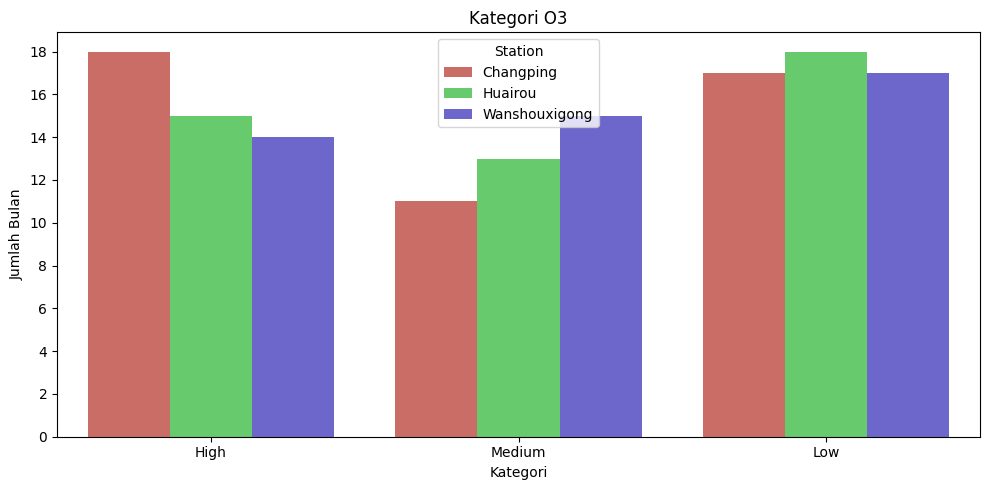

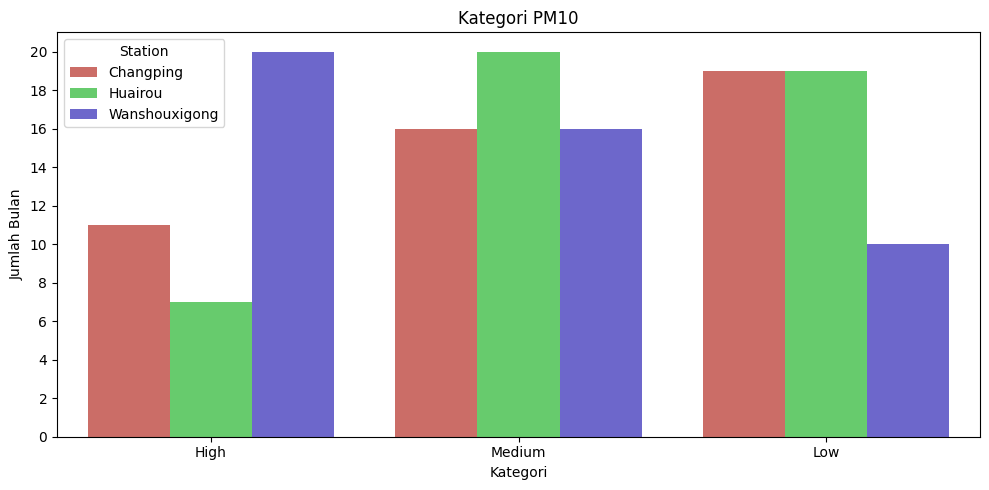

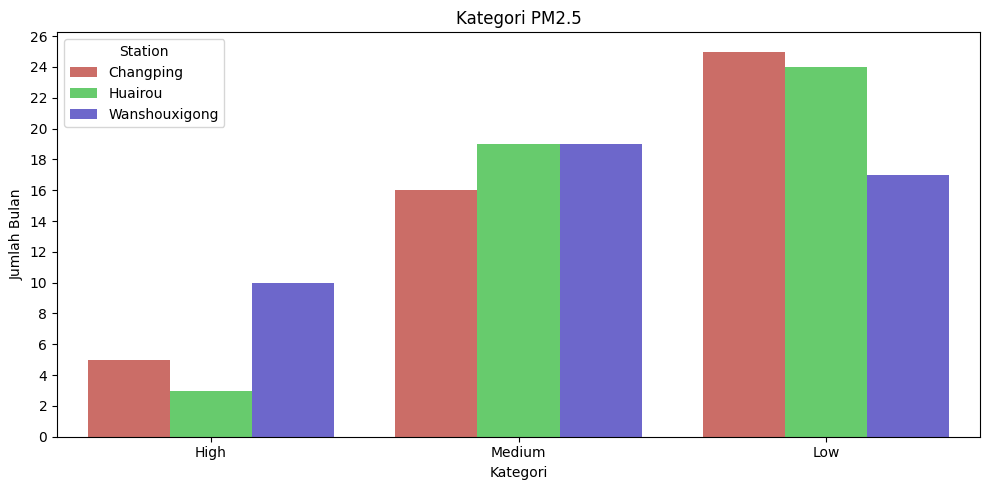

In [64]:
#visualisasi data kategori
for keterangan in vis_cat['Keterangan'].unique():
  plt.figure(figsize=(10,5))
  barplot_cat = sns.barplot(
      data=vis_cat[vis_cat['Keterangan'] == keterangan],
      x='Kategori', y='Jumlah Bulan', hue='Station', estimator = sum,
      palette='hls', errorbar= None,  order= ['High', 'Medium', 'Low']
  )
  plt.title(f"{keterangan}")
  plt.ylabel("Jumlah Bulan")
  plt.gca().yaxis.set_major_locator(MultipleLocator(2))
  plt.tight_layout()
  plt.show()

### insight:
Konsentrasi PM2.5 dan PM10 secara berturut-turut cenderung memiliki nilai lebih tinggi di wilayah urban (Wanshouxigong), suburban (Changping), dan rural (Huairou). Sementara itu, O₃ hampir sama diseluruh wilayah dengan kecenderungan sedikit lebih banyak di wilayah rural.

## Conclusion

1. Pola bulanan PM2.5 dan PM10 menunjukkan konsentrasi lebih banyak di awal dan akhir tahun, sedangkan polutan O₃ pada musim kering (Juni-Juli-Agustus).
2. Pola diurnal PM2.5 dan PM10 menunjukkan konsentrasi lebih banyak di malam hari dengan pola cenderung konstan, sedangkan O₃ puncak konsentrasinya di siang hari.
3. Konsentrasi harian PM2.5 menunjukkan wilayah urban berpolusi tinggi dengan konsentrasi di atas BMUA, sedangkan PM10 dan O3 menunjukkan nilai rata-rata di bawah BMUA di seluruh stasiun.
4. Konsentrasi PM2.5 dan PM10 secara berturut-turut cenderung memiliki nilai lebih tinggi di wilayah urban (Wanshouxigong), sedangkan O₃ lebih banyak di wilayah rural (Huariou).

